In [1]:
from tqdm import tqdm

# TQDM Demo for Data Science

## Intro

[TQDM](https://github.com/noamraph/tqdm) is a great tool if you ever wanted to quickly create a progress bar for your loops. For Data Science this is expecially useful when you're applying a transformation and you want to know if you have time to get another beer.

## How to use

From the TQDM documentation:

> **just wrap any iterator with "tqdm(iterator)"**, and you're done!

Yep, it's that simple!

Let's look at what this progress bar looks like using a simple iterator:

In [2]:
# Iterate from 0 to 999, pause for 0.01s between each iteration
import time
nums = range(1000)
for i in tqdm(nums):
    time.sleep(0.01)

100%|██████████| 1000/1000 [00:11<00:00, 84.44it/s]


As you can see, in Jupyter Notebook tqdm creates a one-line progress bar that shows some useful info including:

- the progress bar itself
- elapsed time
- remaining time
- rate of items per second

## Using TQDM with Other Data Science Packages

### Numpy

Numpy works very much like Python's built-in lists so it's (in most cases) also used in the same way.

In [3]:
# pick out even numbers
import numpy as np
nums = np.arange(100)
evens = np.empty_like([])
for x in tqdm(nums):
    if x%2==0:
        evens = np.append(evens, x)
    time.sleep(0.01)
print evens[:50]

100%|██████████| 100/100 [00:01<00:00, 84.21it/s]

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.  58.
  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.  86.  88.
  90.  92.  94.  96.  98.]


TQDM also works with nested loops.

In [4]:
# pick out even numbers in a matrix
mat = np.arange(100).reshape([5,20])
evens = np.empty_like([])
for i1 in tqdm(range(mat.shape[0])):
    for i2 in tqdm(range(mat.shape[1])):
        if mat[i1,i2]==0:
            evens = np.append(evens, x)
        time.sleep(0.01)
print evens[:50]

100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

[ 99.]


Wait, that's not what we're looking for. Instead, we can use the tqdm_notebook function. This also adds some color to the bars.

In [5]:
# pick out even numbers from a 5x20 matrix this time
from tqdm import tqdm_notebook
mat = np.arange(100).reshape([5,20])
evens = np.empty_like([])
for i1 in tqdm_notebook(range(mat.shape[0])):
    for i2 in tqdm_notebook(range(mat.shape[1]), leave=False):
    # the leave=False argument overwrites the nested loop each time
        x = mat[i1,i2]
        if x%2==0:
            evens = np.append(evens, x)
        time.sleep(0.01)
print evens[:50]


[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.  58.
  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.  86.  88.
  90.  92.  94.  96.  98.]


That looks much better.

However, keep in mind that TQDM requires iterators as the input. It's **recommended to use elementwise operations where possible** in which case TQDM won't be useful. The better way to run the above function is below:

In [6]:
print mat[mat%2==0]

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98]


### Pandas

Like Numpy, Pandas can use elementwise operations which is faster than writing iterative loops. Again, TQDM can't be used with elementwise operation. However, for cases where elementwise operations aren't feasible Pandas does include built-in iterators for its Series and DataFrame objects. 

In [7]:
# generate a random dataset with 2 variables: one numerical and one categorical
import pandas as pd
data = {'x1':np.random.uniform(0,10,100),
        'x2':range(5)*20}
df = pd.DataFrame(data)
print df.head(10)

         x1  x2
0  8.197180   0
1  8.632550   1
2  7.194883   2
3  0.166764   3
4  5.825405   4
5  1.046391   0
6  3.482188   1
7  4.186284   2
8  9.177784   3
9  4.637344   4


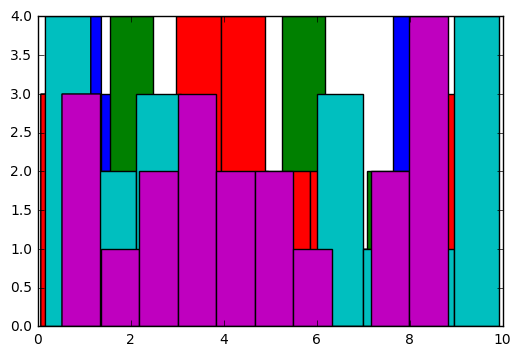

In [8]:
# loop through each category and plot a histogram of x1
# useful for creating a saving graphs for multiple categories
import matplotlib.pyplot as plt
%matplotlib inline
categories = df.x2.unique()
for cat in tqdm_notebook(categories):
    vals = df.ix[df.x2==cat, 'x1']
    plt.hist(vals)
    time.sleep(0.1)
    # plt.savefig('./cat_{}_graph.png'.format(cat))

### Sklearn

Many of the common tasks in Sklearn such as model training and model testing are performed on a dataset as a whole, rather than per record. This is similar to the elementwise recommendations above for Numpy and Pandas. However, there are some functions inside Sklearn that create iterators, such as the KFold functionality which we demonstrate below.

In [9]:
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import f1_score

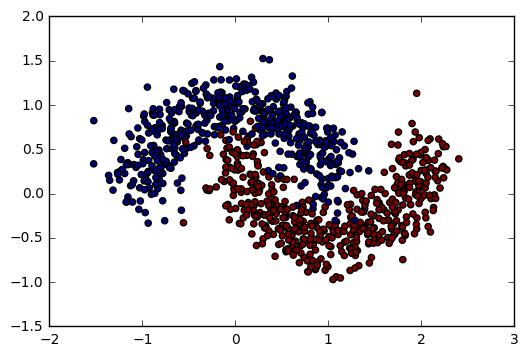

In [10]:
# create a dummy dataset
X, y = make_moons(1000, noise=0.2, random_state=123)
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y)

In [11]:
# define KFold and KNN objects
kf = KFold(len(X), n_folds=10, shuffle=True, random_state=123)
clr = KNeighborsClassifier()

In [12]:
# for each Fold, split test+train, then train model, finally evaluate model
for train_index, test_index in tqdm_notebook(kf):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    clr.fit(X_train, y_train)
    y_pred = clr.predict(X_test)
    
    print f1_score(y_test, y_pred)
    time.sleep(0.1)

0.967741935484
0.989247311828
0.991452991453
0.979591836735
0.963636363636
0.962962962963
0.953488372093
0.957446808511
0.969696969697
0.971962616822

